# Statistical Distributions

As a data scientist, you use statistical inferences to examine the structure of the data and to predict through it. In order to make these statistical inferences, it is necessary to know the probability distributions of the data. In this section, we will study some of the distributions that data scientists often use and which are of great importance for data science applications.

When we start working on a dataset that is defined by a distribution, we should ask the following four basic questions to the raw data:

* Does the data set consist of categorical data or continuous data?
* Are the data distributed symmetrically? In other words, are the values to the left and right of the mean equal or close to equal?
* Are there any upper or lower limits of the values that the data can take? For example, unemployment data cannot be below zero.
* Are outliers observed when the data is distributed?

The answers to these questions give clues about the similar data distributions. Therefore, before we begin to analyze the data, we must be familiar with the data very well.

It is very useful for us to know the probability distributions here. In this lesson we will introduce the following distributions that are frequently used in statistical analysis:

* Normal (Gaussian) Distribution
* Bernoulli Distribution
* Binomial Distribution
* Uniform Distribution

# 1. Normal Distribution

Normal distribution has an important role in statistics and is the most widely used distribution. It is also called the Gaussian distribution because it was discovered by the German mathematician Carl Friedrich Gauss. It describes many cases that we encounter in daily life. Simply put, if most values in the distribution are clustered around the mean, the rest is defined as normal or normally distributed if symmetrically to the right and left of the mean.

The normal distribution is defined by two parameters: Mean $(\mu)$ and standard deviation $(\sigma)$. In other words, mean and standard deviation and normal distribution can be defined. The probability density is normally as a function for a distributed variable:

$$
f(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\sigma^2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Below is the probability density function of three normally distributed variables with the same mean but with different standard deviation in the graph on the left, and the probability density function of three variables with the same standard deviation but different mean.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
normal_mean_1 = np.random.normal(10, 1, 1000)
normal_mean_2 = np.random.normal(100, 1, 1000)

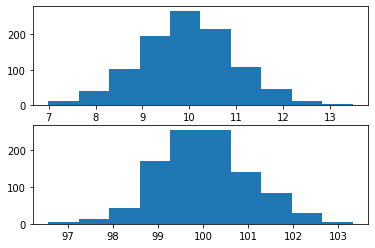

In [7]:
plt.subplot(2, 1, 1)
plt.hist(normal_mean_1)
plt.title('Normal Dist. with mean of 10')
plt.subplot(2, 1, 2)
plt.hist(normal_mean_2)
plt.title('Normal Dist. with mean of 100')
plt.show()

Examining these graphs reveals that the normal distribution is symmetric with respect to the x = $\mu$ line and the mean ($\mu$) divides the area into two equal parts.

Let's create the Probability Density Function (pdf) for the normal distribution. To do this, we  generate x values from the numpy library with the `linspace ()` function and generate y values with the pdf function in the norm module of the `scipy.stats` library. 

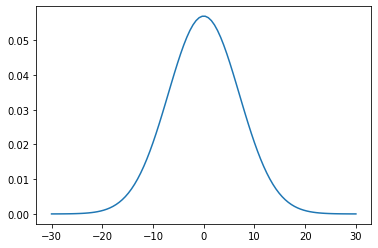

In [2]:
mu = 0
std = 7
x = np.linspace(-30, 30, 100)
y = norm.pdf(x, mu, std)
plt.plot(x, y)
plt.show()

Around 68% of the data points in a normally distributed variable are above or below a standard deviation of the mean value. 95% of these values are two standard deviations of the mean and 99.7% are above or below three standard deviations of the mean.

<img src="norm_dist.png" width="600">

To create a normally distributed variable, we can use the `norm ()` function in the random module of the numpy library. For this purpose, it is sufficient to determine an average ($\mu$), standard deviation ($\sigma$) and number of observations (n). Generate a normally distributed data with 10000 observations, mean is 0 and a standard deviation is 1. Let's plot its histogram.

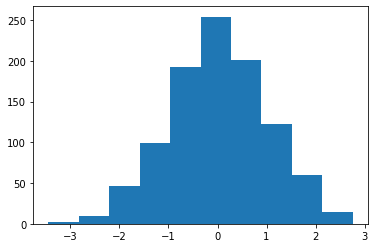

In [4]:
mu = 0
std = 1
n = 1000
sample = np.random.normal(mu, std, n)
plt.hist(sample);

Now let's combine both the histogram and the line plot of the probability density function. Thus, we better understand how the probability density function can be used. Note that we use the formula of the probability density function when plotting the graph below!

As seen in the figure above, there is a symmetrical distribution of about 0.5 which is the average of the distribution.


Normal distribution is very important for data scientists. Because:

* It can be easily summarized by only two statistical parameters (mean ($\mu$) and standard deviation ($\sigma$).
* The area under the curve is 1, which makes it easy to calculate the probability of discrete results within the distribution.
* In many areas such as psychology and finance, data are closely distributed to normal.
* In general, any variable that measures the outcome of many minor effects is independently close to the normal distribution.
* Many of the common indicators (z-score) and statistical tests (t-tests, ANOVAs, bell curve) are based on the assumption of normal distribution of data. Thus, the normal distribution is easy to use and is therefore widely used.


The normal distribution of $\mu$ = 1 and $\sigma$ = 0 is called the standard normal distribution

## 1.1. Deviation from Normal Distribution

Unfortunately, the fact that the normal distribution is so useful often leads to the "assumed" distribution in people's minds. However, unlike ideal mathematical concepts, real data is never perfect. Some data may show a distribution close to normal distribution more than others. If data that is not normally distributed is treated as normal, it may lead to incorrect mapping between statistics and data and false results.

##  1.2. QQ Plots

It is wise to observe how data is distributed through histograms and quantile-quantile (QQ plots).
First, let's look at the concept of quantile. We studied the concept of median in the previous lesson. When we sort the data in the data set from small to large, we call the data in the middle as median. The 50% here is not about the size of the data, but about the number of observations in the data set. We can find out which quarter of a data corresponds to all the data.

QQ charts are used to compare the distributions of two different data sets. If we know the distribution of one of the data sets we compare and the other one is similar to this data set, we can say that it has the same distribution as the distribution.

To compare the two samples, we first sort them in ascending order. Intuitively, if the two samples come from the same distribution, the items at a given position in the sorted samples will tend to be "similar". (For instance, we'd expect the 10% quantiles, the 20% quantiles, the medians, and so on, to be similar.) We visualize this idea by plotting the sorted samples, using one sample for the x axis and the other one for the y axis. If the samples have been generated from the same distribution, this plot will show something similar to a straight line. (For large sample sizes, the line becomes clearer.)

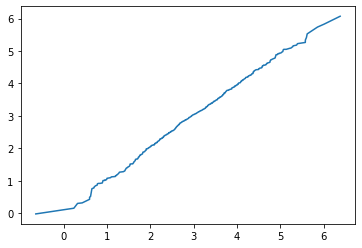

In [5]:
n = 1000
sample1 = np.random.normal(3, 1, n)
sample2 = np.random.normal(3, 1, n)
plt.plot(sorted(sample1), sorted(sample2))

In the example above, we used two samples from the same distribution and the plot was a straight line. On the other hand, if we compare two samples from different distributions, the plot is clearly not a straight line.

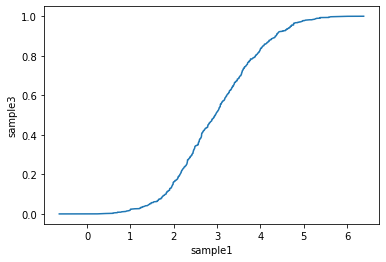

In [12]:
sample3 = np.random.random(size=n)
plt.plot(sorted(sample1), sorted(sample3))
plt.xlabel('sample1')
plt.ylabel('sample3')
plt.show()

Now, instead of comparing two samples, let's assume that we have one sample and we ask if that sample was generated by a normal distribution. In that case, we replace the second sample by the theoretical quantiles defined by the distribution.

SciPy has a built-in function for that purpose. (If we don't specify a distribution, it will use a normal distribution by default.)

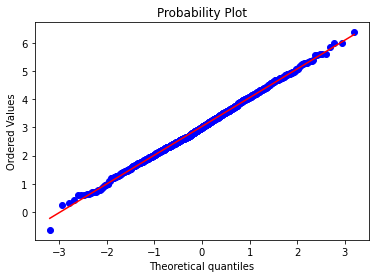

In [16]:
from scipy import stats
stats.probplot(sample1, plot=plt)
plt.show()

Let us  zoom in the steps we have taken so far:

* Observations are sorted in ascending order.
* The benchmark distribution is then plotted against each of them on the x-axis and the unknown variable on the y-axis.
* If the unknown distribution shares the same distribution as the known variable, the result must be a straight line from the bottom left to the top right.
* Deviations from the straight line indicate that the data does not fully match the distribution.


Let us now draw the histogram and observe important statistic.

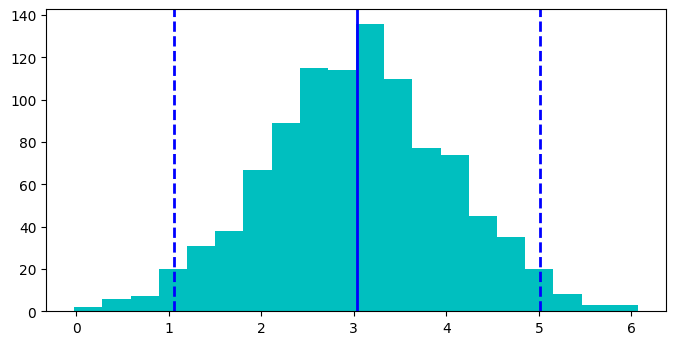

In [18]:
plt.figure(figsize=(8,4), dpi = 100)
plt.hist(sample2, bins=20, color = 'c')
plt.axvline(np.mean(sample2), color='b', linestyle='solid', linewidth=2) 
plt.axvline(np.mean(sample2) + 2 * np.std(sample2), color='b', linestyle='dashed', linewidth=2) 
plt.axvline(np.mean(sample2) - 2 * np.std(sample2), color='b', linestyle='dashed', linewidth=2)
plt.show()

Since the dataset named `normal_distribution` is distributed normally, the mean is placed where the data sets are located, ie, about 50% of the data falling on both sides and about 67% of the data that is one standard deviation from the mean. However, in some data sets, the average standard deviation does not include the same amount of data on either side of the average. In other words, since the average does not fall to the center, it is no longer a measure of the “central” tendency, and the standard deviation no longer shows how much variance there is. This is defined as skewness. 

* First dataset : Mean ($\mu$) < Median
* Second dataset : Mean ($\mu$)= Median
* Third dataset : Mean ($\mu$)> Median

Now, Let's look at the Q-Q plots of these datasets.

<img src="qqplot.png" width="800">

# 2. Other Distributions

Although it is easy and common to work with the normal distribution, we cannot use the normal distribution if the data we work does not fit the normal distribution. So far, we have classified the data as "normal" or "non-normal", we will now examine "non-normal" distributions. There are many distributions with useful properties to address specific statistical problems. Let us summarize some of the distributions you will use from time to time as a data scientist.

##  2.1. Bernoulli Distribution

The Bernoulli distribution represents two possible consequences of an event (such as a coin-to-coin game).

<img src="bernoulli_dist.png" width="500">

The Bernoulli distribution is a special case of the Binomial distribution in which a single experiment is carried out with a number of observations of 1, so the Bernoulli distribution describes events with exactly two consequences. Simply put, mathematically, p shows the probability of the event and k shows the results.

Probability mass function for Bernoulli distribution:

$$
f(k|p)=\begin{cases}
p,&\text{if }k=1\\
1-p,&\text{otherwise}\\
\end{cases}$$

When a distribution is discrete (it takes only integers), that probability is defined by the probability mass function. Continuous distribution has the probability density function.

We can use the `binomial ()` function in the random module of the numpy library to make a Bernoulli experiment. It is enough to give a value of 1 to the distribution parameter (n), which is the first parameter in this function.

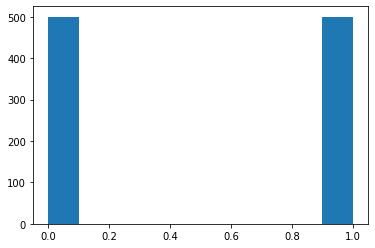

In [20]:
bernoulli = np.random.binomial(1, .5, 1000)
plt.hist(bernoulli);

As mentioned, the Bernoulli distribution modeling over probability, such as success, failure, or coin, gives us the probability of 0 or 1.

##  2.2. Binomial Distribution

The binomial distribution is related to finding the probability of success of an event that produces only two results in a series of experiments. For example, throwing a coin will always result in a coin or coin. It is estimated that during the binomial deployment it is possible to find exactly 3 rounds by repeatedly throwing coins 10 times.

Binomial distribution and Bernoulli distribution can be mixed. To explain, a Bernoulli random variable has two possible consequences: 0 or 1.

A binomial distribution is the sum of Bernoulli random variables distributed independently and indenpendent and identically. For example, the gain from a coin throw is the Bernoulli random variable. If this experiment is repeated 10 times, the yield is between 0 and 10 dollars. The probability of winning 10 pounds is p 10.

The binomial distribution counts the number of successes of these events when there is a binary event repeated many times (such as many coin flips). p indicates the probability of achieving k successes during the repetition of activity n.

Probability mass function:

$$
f(k|n,p)={n\choose k} p^k(1-p)^{n-k}$$

Flipping a coin is a good example for binomial distribution. Assume that after flipping a coin 10 times, we realize that probability of getting tail is 0.4, that is p(Y)=0.4, and  probability of getting head is 0.6, that is P(T)=0.6. In this case, the probability of getting head 4 times

Let us take the flipping a coin case. Suppose that, after flipping the coin 10 times, it turns out the probability of getting tail is 0.4, P(Y)= 0.4, and getting head is 0.6, P(T)=0.6. Then, the probability of getting tail 4 times out of a sample size of 10 is:

$$
p(k=4)=C^{10}_4(0.4)^4(0.6)^6$$

Let's create a Bernoulli distribution with a probability of 0.5 in 20 of 100 repeats. Since there is no built-on Bernoulli distribution code in Python, we are trying to model the Bernoulli distribution using binomial distribution.

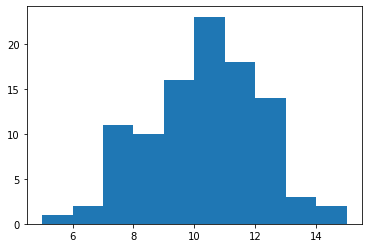

In [21]:
binomial = np.random.binomial(20, 0.5, 100)
plt.hist(binomial);

Now let's experiment with the binomial function in the `stats` module of the `scipy` library with different number of repeats and probability values. This function returns a distribution object of type `rv_frozen`. We can do many things with this object variable. Here, we will create y values for x values with values between 1 and 40 by means of pmf () (probability mass function) and plot the function.

##  2.3. Uniform Distribution

A uniform distribution is a probability distribution in which each value in a given range is equally likely to occur and that out-of-range values are never likely to occur. As the probability of occurrence of an event at any equal range along the uniform probability density graph is equal, this curve defining the distribution takes the form of a rectangular shape with a constant height over the range and a height of 0 outside the defined range.

Because the area under the curve must be equal to 1, the length of the interval determines the height of the curve. The following figure shows the even distribution of the range. (a, b). Note that the field should be 1.

<img src="uniform.png" width="400">

If we plot the density of a uniform distribution, it will appear flat because no value is more likely (and therefore has more density) than the other.


If a countinous variable X has a following probability density function, X is said to be uniformly distributed.

$$ f(x)=\frac{1}{b-a},a<x<b$$

Uniform distribution is sometimes called rectangular distribution. Because the probability density function of the uniform distribution is similar to a rectangle.

Now, with python, let's create a uniformly distributed dataset and draw its histogram and density function. To create a dataset, we will use the `uniform ()` function in the stats module of the scipy library.

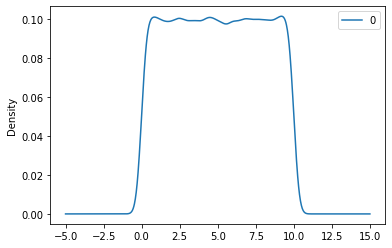

In [26]:
uniform = stats.uniform.rvs(size=100000,loc=0, scale=10)
df = pd.DataFrame(uniform)
df.plot(kind='density');

Finally, let's remember to create data sets with the distributions we see in this lesson:

* Random number generation from Bernoulli distribution with 100 rows and 1 column and with probability of success p

``` python
np.random.binomial(1,p,(100,1))
```
* Random number generation from a Binomial distribution with 100 rows and 10 column 

``` python
np.random.binomial(n,p,(100,10))
```
* Given a mean and variance, data generation from a normal distribution with 1000 rows and 1 column 

``` python
np.random.normal(mu, sigma, (1000,1))
```
* Data generation from a uniform distribution with 1 row and column and with a specific upper and lower limit

``` python
np.random.uniform(low, high, (1,1))
```